In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

###  Here, I use the breast cancer dataset which can be obtained from sklearn.datasets. It is also available in Kaggle.

In [4]:
b_cancer = load_breast_cancer()
b_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

###  #  Let’sdeclare our independent variable and the target variable.


In [19]:
x = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
y = pd.Categorical.from_codes(b_cancer.target, b_cancer.target_names)
x
y

['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']

###  The target is to classify whether it is a benign or malignant cancer. So, let’s encode the target variable as 0 and 1. 0 for malignant, and 1 for benign.

In [24]:
from  sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

### Now we split our dataset as train set and test set.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.20, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
s_scaler = StandardScaler()

In [44]:
x_train = s_scaler.fit_transform(x_train)

In [46]:
x_test = s_scaler.fit_transform(x_test)

In [48]:
x_test

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

# Decision Classifier (Classification)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model

DecisionTreeClassifier(max_depth=2)

In [55]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[27] <= 0.428\ngini = 0.462\nsamples = 455\nvalue = [290, 165]'),
 Text(0.25, 0.5, 'x[23] <= 0.13\ngini = 0.146\nsamples = 303\nvalue = [279, 24]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.073\nsamples = 288\nvalue = [277, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.75, 0.5, 'x[23] <= -0.259\ngini = 0.134\nsamples = 152\nvalue = [11, 141]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.043\nsamples = 138\nvalue = [3, 135]')]

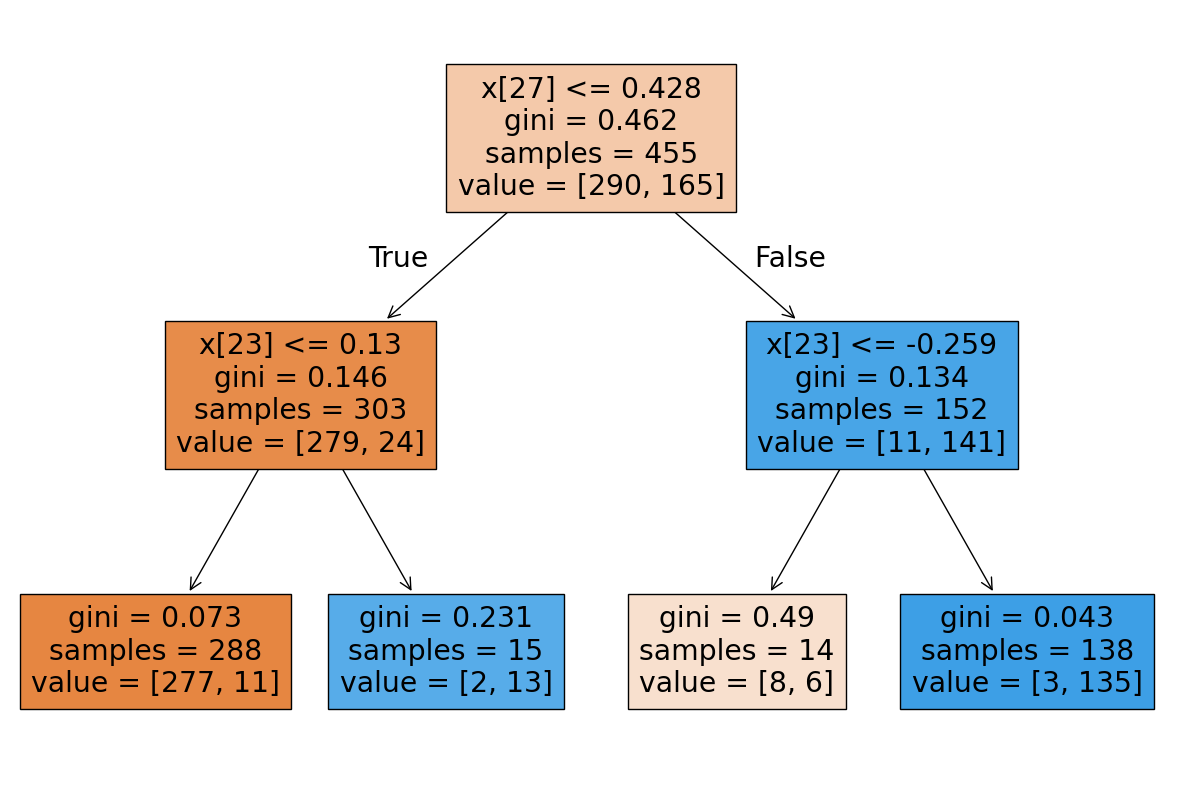

In [57]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True)

# Adaboost Classifier

In [59]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)

In [60]:
classifier.fit(x_train, y_train)

C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [63]:
print(classifier)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)


In [64]:
classifier

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [65]:
prediction = classifier.predict(x_test)
prediction

array(['malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant',
       'malignant', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign',

In [69]:
confusion_matrix(y_test, prediction)

array([[66,  1],
       [ 3, 44]], dtype=int64)

In [72]:
accuracy = accuracy_score(y_test, prediction)
print('AdaBoost Accuracy: ', accuracy)

AdaBoost Accuracy:  0.9649122807017544
